# Import Library

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [ ]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#卷積層2與池化層2

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [15]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [17]:
model.add(Dense(10, activation='softmax'))

In [18]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [20]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)   

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 274s 7ms/step - loss: 0.0897 - acc: 0.1268 - val_loss: 0.0893 - val_acc: 0.1739
Epoch 2/10
40000/40000 [==============================] - 258s 6ms/step - loss: 0.0887 - acc: 0.1655 - val_loss: 0.0884 - val_acc: 0.2256
Epoch 3/10
40000/40000 [==============================] - 254s 6ms/step - loss: 0.0871 - acc: 0.2064 - val_loss: 0.0869 - val_acc: 0.2583
Epoch 4/10
40000/40000 [==============================] - 254s 6ms/step - loss: 0.0851 - acc: 0.2444 - val_loss: 0.0852 - val_acc: 0.2812
Epoch 5/10
40000/40000 [==============================] - 253s 6ms/step - loss: 0.0835 - acc: 0.2685 - val_loss: 0.0839 - val_acc: 0.3043
Epoch 6/10
40000/40000 [==============================] - 254s 6ms/step - loss: 0.0824 - acc: 0.2916 - val_loss: 0.0831 - val_acc: 0.3191
Epoch 7/10
40000/40000 [==============================] - 253s 6ms/step - loss: 0.0813 - acc: 0.3078 - val_loss: 0.0820 - 

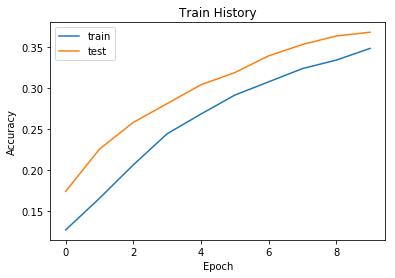

In [21]:
show_train_history('acc','val_acc')

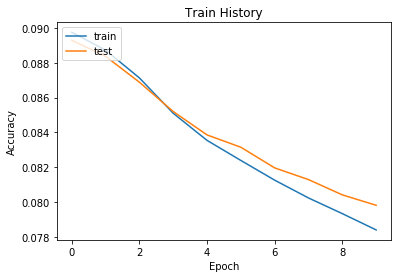

In [22]:
show_train_history('loss','val_loss')

In [23]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)   

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 139s 3ms/step - loss: 0.2670 - acc: 0.9038 - val_loss: 0.2674 - val_acc: 0.9011
Epoch 2/10
40000/40000 [==============================] - 139s 3ms/step - loss: 0.2539 - acc: 0.9058 - val_loss: 0.2556 - val_acc: 0.9025
Epoch 3/10
40000/40000 [==============================] - 139s 3ms/step - loss: 0.2441 - acc: 0.9076 - val_loss: 0.2495 - val_acc: 0.9034
Epoch 4/10
40000/40000 [==============================] - 139s 3ms/step - loss: 0.2361 - acc: 0.9098 - val_loss: 0.2419 - val_acc: 0.9045
Epoch 5/10
40000/40000 [==============================] - 138s 3ms/step - loss: 0.2291 - acc: 0.9115 - val_loss: 0.2349 - val_acc: 0.9066
Epoch 6/10
40000/40000 [==============================] - 138s 3ms/step - loss: 0.2231 - acc: 0.9132 - val_loss: 0.2289 - val_acc: 0.9088
Epoch 7/10
40000/40000 [==============================] - 139s 3ms/step - loss: 0.2173 - acc: 0.9155 - val_loss: 0.2229 - 

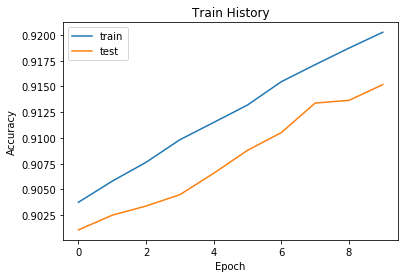

In [24]:
show_train_history('acc','val_acc')

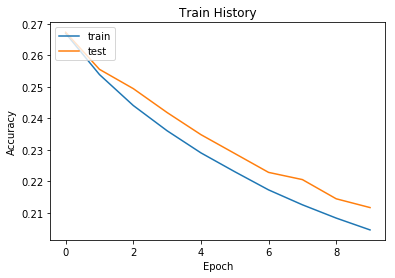

In [25]:
show_train_history('loss','val_loss')